       invoice_id   Branch         City                category unit_price  \
0               1  WALM003  San Antonio       Health and beauty     $74.69   
1               2  WALM048    Harlingen  Electronic accessories     $15.28   
2               3  WALM067  Haltom City      Home and lifestyle     $46.33   
3               4  WALM064      Bedford       Health and beauty     $58.22   
4               5  WALM013       Irving       Sports and travel     $86.31   
...           ...      ...          ...                     ...        ...   
10046        9996  WALM056      Rowlett     Fashion accessories        $37   
10047        9997  WALM030   Richardson      Home and lifestyle        $58   
10048        9998  WALM050     Victoria     Fashion accessories        $52   
10049        9999  WALM032        Tyler      Home and lifestyle        $79   
10050       10000  WALM069     Rockwall     Fashion accessories        $62   

       quantity      date      time payment_method  rating  pro

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation si

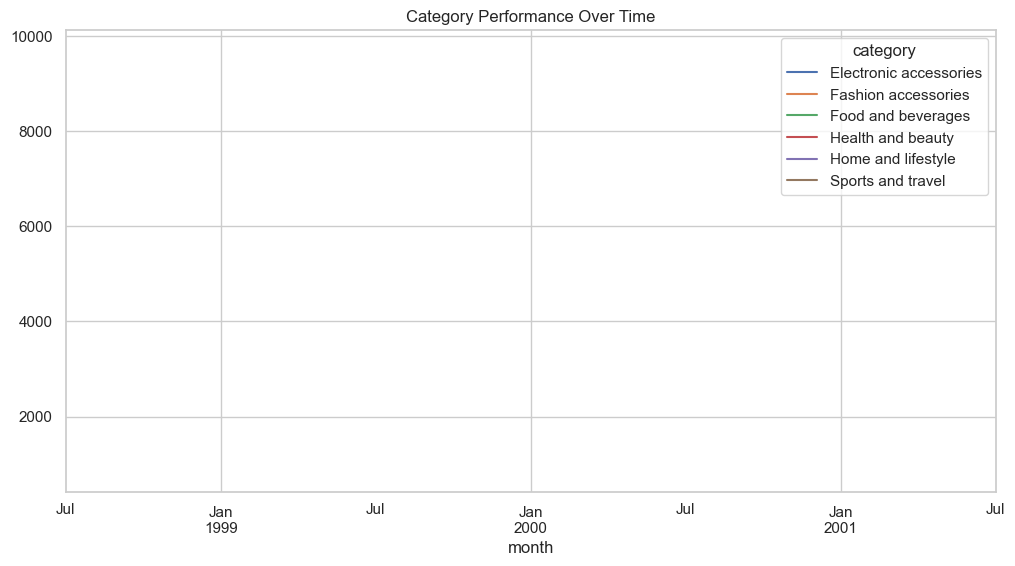

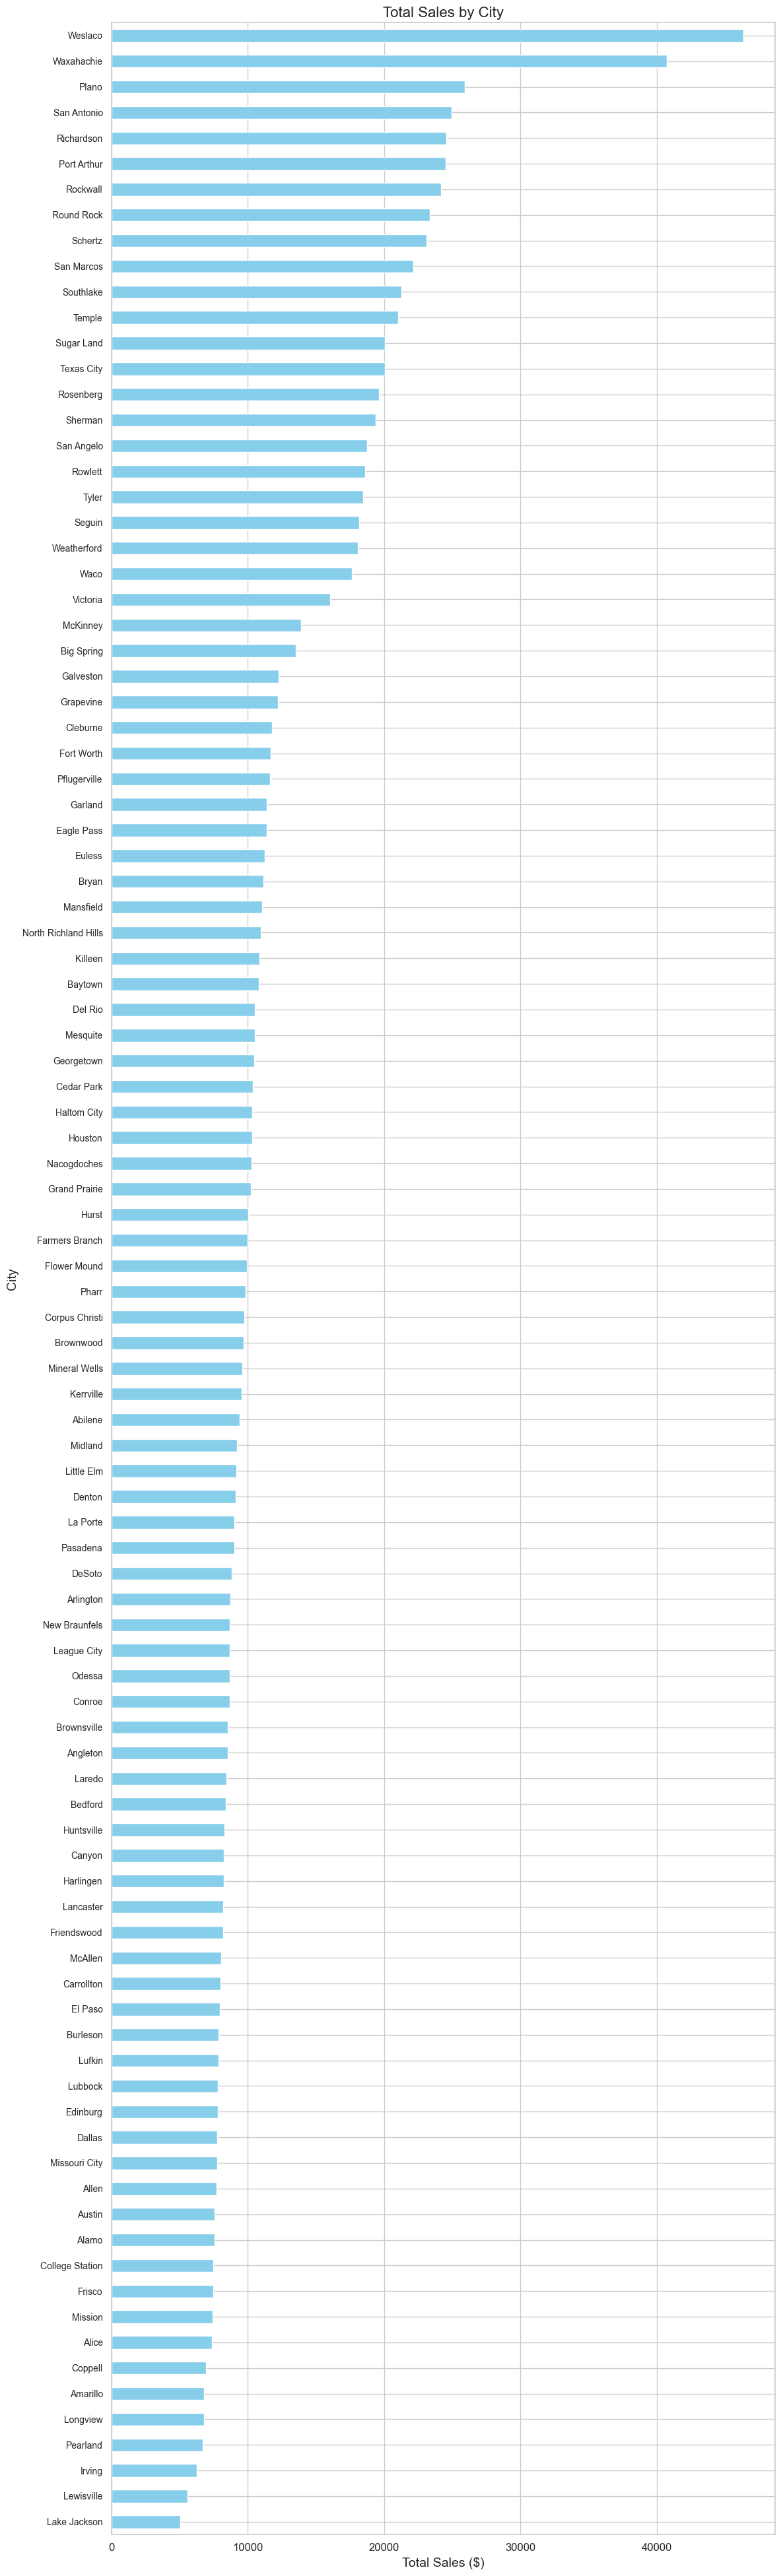

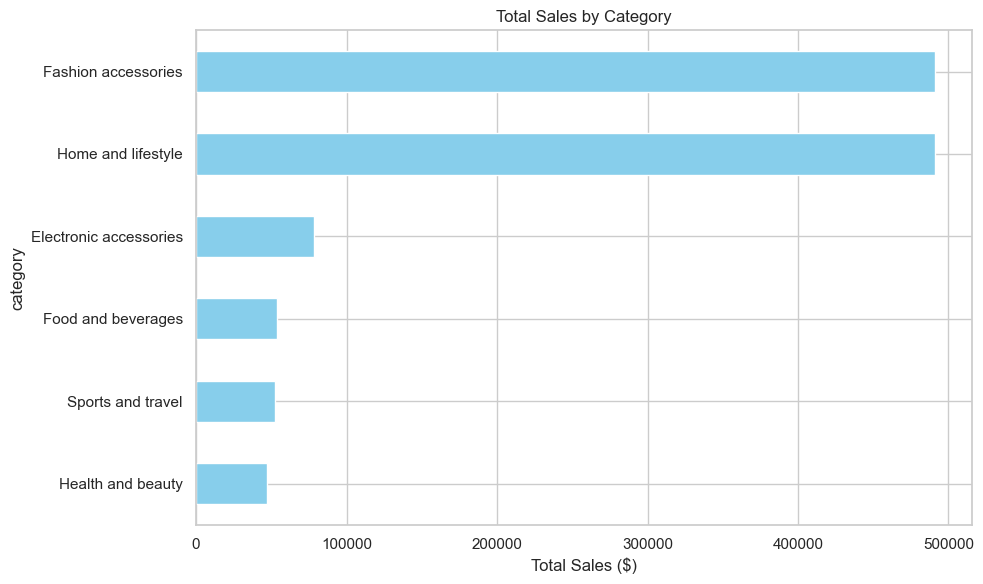

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation si

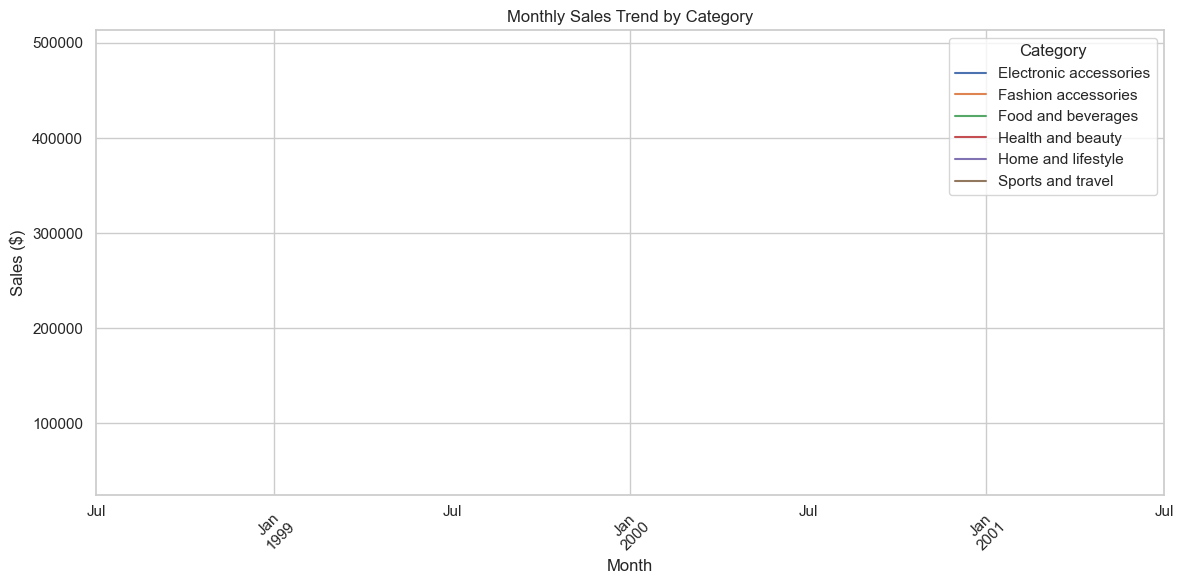

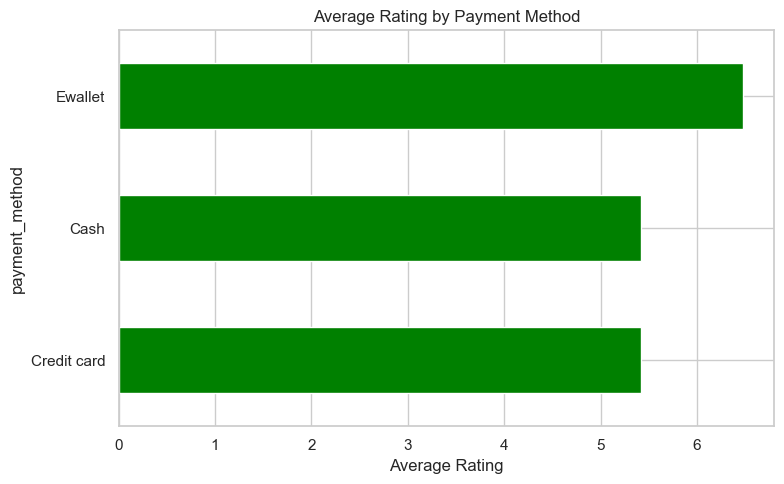

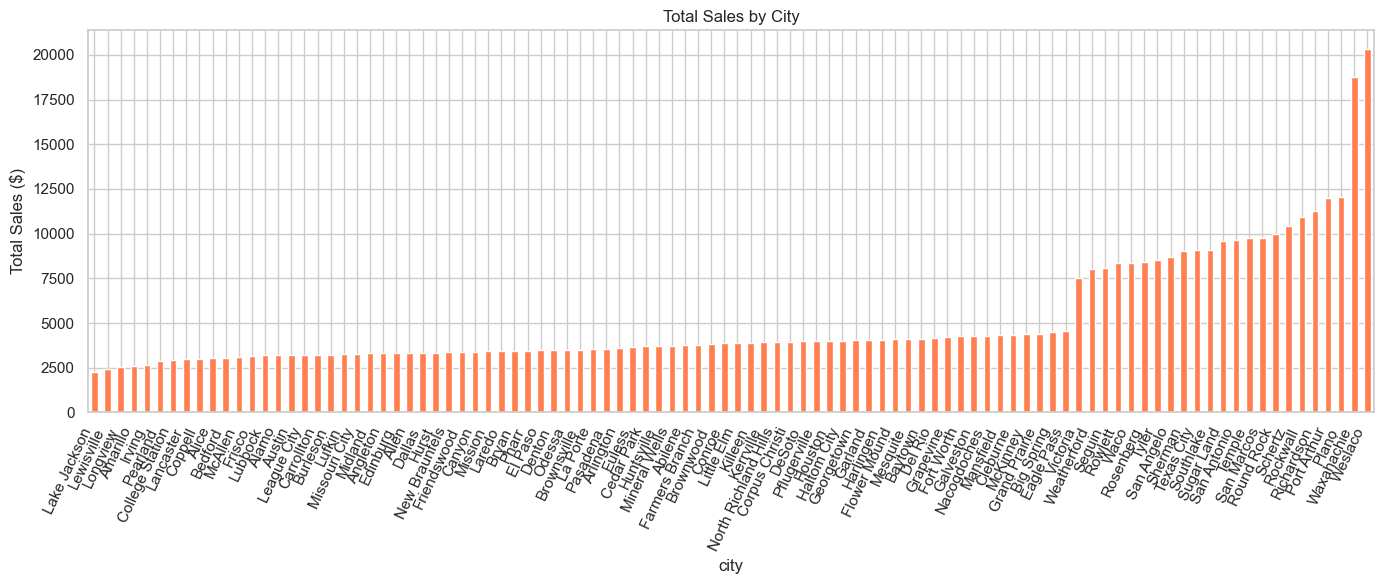

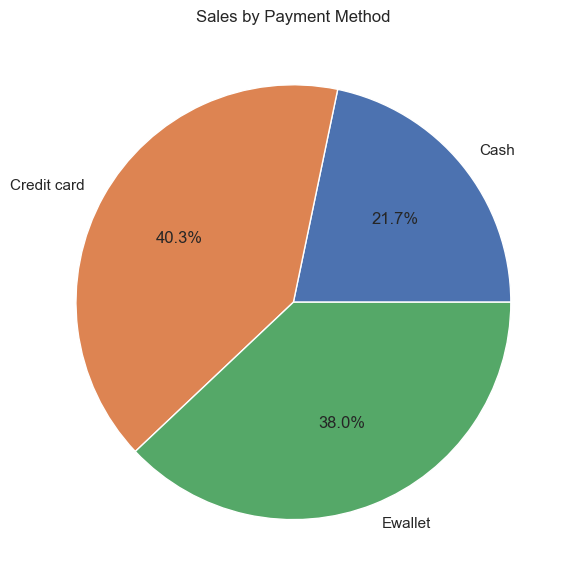

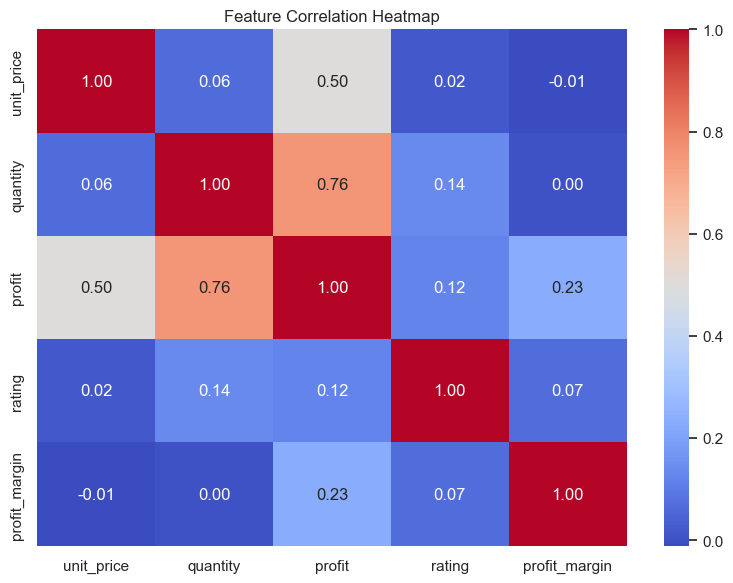

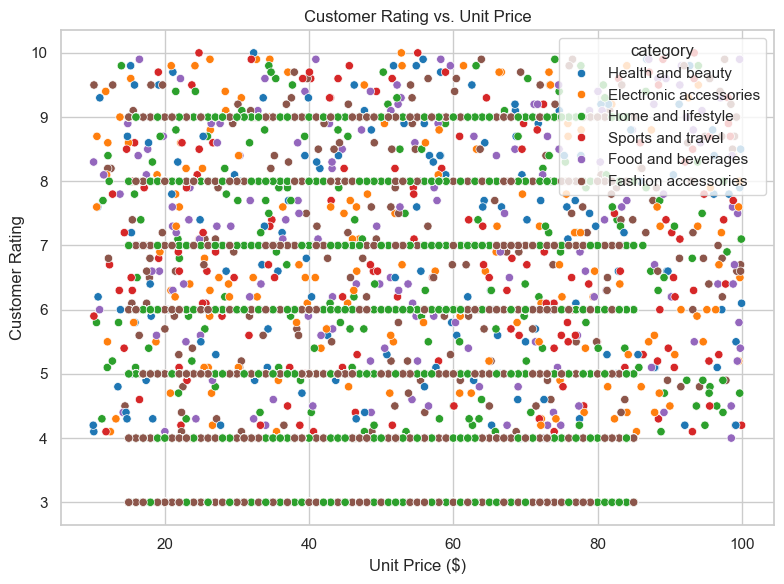

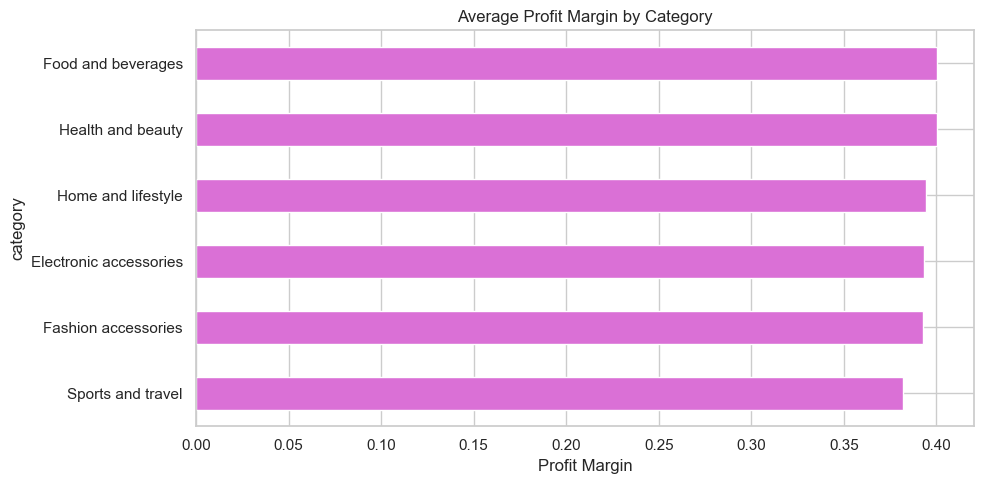

In [116]:
import pandas as pd
# Load the data
df = pd.read_csv('/Users/hadjer/data/Walmart.csv')
print (df)
print("Original dataset shape:", df.shape)
# Remove duplicates
df = df.drop_duplicates()
print("Cleaned dataset shape:", df.shape)
print(df.isnull().sum())
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['unit_price'] = df['unit_price'].replace(r'[\$,]', '', regex=True)
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')
df['unit_price'] = df['unit_price'].fillna(df['unit_price'].median())
print("Missing values in unit_price after cleaning:", df['unit_price'].isnull().sum())
df['quantity'] = df['quantity'].fillna(df['quantity'].median())
print("Missing values in quantity after cleaning:", df['quantity'].isnull().sum())
df.dtypes
print(df['unit_price'].dtype)
print(df['rating'].dtype)
df['quantity'] = pd.to_numeric(df['quantity'], downcast='integer')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print(df['date'].dtype) # Should show: datetime64[ns]
df['time'] = pd.to_datetime(df['time'], format='%H:%M', errors='coerce')
print(df['time'].dtype)
df.dtypes
print(df.isnull().sum())
import numpy as np
import pandas as pd
df['date'] = df['date'].astype(str).str.strip()
df['date'] = df['date'].replace(['', 'nan', 'NaN', 'None'], np.nan)
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%Y-%m-%d')
df['time'] = df['time'].astype(str).str.strip()
df['time'] = df['time'].replace(['', 'nan', 'NaN', 'None'], np.nan)
df['time'] = pd.to_datetime(df['time'], errors='coerce').dt.time 
print("Missing 'date' values:", df['date'].isnull().sum())
print("Missing 'time' values:", df['time'].isnull().sum())
df['date'] = df['date'].fillna(pd.Timestamp('2000-01-01'))
df['time'] = df['time'].fillna(pd.to_datetime('00:00:00').time())
print("Missing dates:", df['date'].isnull().sum())
print("Missing times:", df['time'].isnull().sum()) 
# Save the cleaned file
df.to_csv('walmart_cleaned.csv', index=False)
# Load the data
df = pd.read_csv('/Users/hadjer/walmart_cleaned.csv')
 #A. Core Business Performance Questions
#Top Performing City by Sales
#Question: Which city generated the highest total sales (unit_price × quantity)?
#Purpose: Identify key revenue-generating markets to focus marketing and stock.
# Create a new column total_sales = unit_price * quantity
df['total_sales'] = df['unit_price'] * df['quantity']
# Now group by city and sum total_sales
top_cities = df.groupby('city')['total_sales'].sum().sort_values(ascending=False)
print(top_cities)
# Best-Selling Product Category
df.groupby('category')['quantity'].sum().sort_values(ascending=False)
#Branch Profitability Comparison
# Create total_sales column first
df['total_sales'] = df['unit_price'] * df['quantity']
# Calculate profit using profit_margin
df['profit'] = df['total_sales'] * df['profit_margin']
# Now group by branch and sum profit
branch_profit = df.groupby('branch')['profit'].sum().sort_values(ascending=False)
print(branch_profit)
# Peak Sales Time Analysis
# Convert 'time' column to datetime (if not already)
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
# Extract hour as a new column
df['hour'] = df['time'].dt.hour
# Analyze transaction count by hour
df.groupby('hour').size().sort_values(ascending=False)
#Category Performance Over Time
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
# Now you can extract the month safely
df['month'] = df['date'].dt.to_period('M')
# Plot category performance over time (monthly quantity sold)
df.groupby(['month', 'category'])['quantity'].sum().unstack().plot(figsize=(12, 6), title='Category Performance Over Time')
#6. Customer Satisfaction by Payment Method
df.groupby('payment_method')['rating'].mean().sort_values(ascending=False)
#B7. ranch Specialization
df.groupby(['branch', 'category'])['total_sales'].sum().groupby('branch').idxmax()

#8. City-Level Profit Margin
df.groupby('city')['profit_margin'].mean().sort_values(ascending=False)
#9.Repeat Purchase Potential by Category
df.groupby('category')['rating'].mean().sort_values(ascending=False)
#10. Cash vs. Digital Preference by City
df.groupby(['city', 'payment_method']).size().unstack(fill_value=0)
#11.Low-Rated Transactions
df[df['rating'] <= df['rating'].quantile(0.1)].sort_values(by='rating')
#12. Profit Margin by Category
df.groupby('category')['profit_margin'].mean().sort_values(ascending=False)
#13.Correlation Between Price and Rating
df[['unit_price', 'rating']].corr()
#15. Profit Per Unit by Category
df['profit_per_unit'] = df['profit'] / df['quantity']
df.groupby('category')['profit_per_unit'].mean().sort_values(ascending=False)
#17. Category Diversity by City
df.groupby('city')['category'].nunique().sort_values(ascending=False)
#18. Average Transaction Value by Payment Method
df.groupby('payment_method')['total_sales'].mean().sort_values(ascending=False)
#19. Outlier Detection
df.describe(include='all')  # Then filter manually
# For example: High price outliers
df[df['unit_price'] > df['unit_price'].quantile(0.95)]
import matplotlib.pyplot as plt
import seaborn as sns
# Example: Bar plot of total sales by city
import matplotlib.pyplot as plt
import seaborn as sns
# Compute total sales
df['total_sales'] = df['unit_price'] * df['quantity']
# Group by city
sales_by_city = df.groupby('city')['total_sales'].sum().sort_values()
# Horizontal bar chart with large figure size
plt.figure(figsize=(12, len(sales_by_city) * 0.4))  # Dynamically adjust height
sns.set(style="whitegrid")
sales_by_city.plot(kind='barh', color='skyblue')
plt.title('Total Sales by City', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
#Sales by Product Category (Bar Plot)
category_sales = df.groupby('category')['total_sales'].sum().sort_values()
category_sales.plot(kind='barh', color='skyblue', figsize=(10, 6), title='Total Sales by Category')
plt.xlabel('Total Sales ($)')
plt.tight_layout()
plt.show()
#Monthly Sales Trend by Category (Line Plot)
df['month'] = df['date'].dt.to_period('M')
monthly_sales = df.groupby(['month', 'category'])['total_sales'].sum().unstack()
monthly_sales.plot(figsize=(12, 6), title='Monthly Sales Trend by Category')
plt.ylabel('Sales ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()
#4. Average Rating by Payment Method (Bar Plot)
rating_payment = df.groupby('payment_method')['rating'].mean().sort_values()
rating_payment.plot(kind='barh', color='green', figsize=(8, 5), title='Average Rating by Payment Method')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.show()
#5. Profit by Branch (Horizontal Bar Plot)
plt.figure(figsize=(14, 6))
city_sales = df.groupby('city')['unit_price'].sum().sort_values()
city_sales.plot(kind='bar', color='coral')
plt.title('Total Sales by City')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=65, ha='right')  # Rotate labels for clarity
plt.tight_layout()
plt.show()
#6.Sales Distribution by Payment Method (Pie Chart)
payment_sales = df.groupby('payment_method')['total_sales'].sum()
payment_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Sales by Payment Method')
plt.ylabel('')
plt.tight_layout()
plt.show()
#7. Correlation Heatmap (Seaborn)
import seaborn as sns
corr = df[['unit_price', 'quantity', 'profit', 'rating', 'profit_margin']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()
#8.Customer Ratings vs Unit Price (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='unit_price', y='rating', hue='category', palette='tab10')
plt.title('Customer Rating vs. Unit Price')
plt.xlabel('Unit Price ($)')
plt.ylabel('Customer Rating')
plt.tight_layout()
plt.show()
#10. Average Profit Margin by Category (Bar Plot)
category_margin = df.groupby('category')['profit_margin'].mean().sort_values()
category_margin.plot(kind='barh', color='orchid', figsize=(10, 5), title='Average Profit Margin by Category')
plt.xlabel('Profit Margin')
plt.tight_layout()
plt.show()